In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def plotseries(time,series,formatIcon='-',start=0,end=None,label=None):
    plt.figure(figsize=(10,6))
    plt.plot(time[start:end],series[start:end],formatIcon,label=label)
    plt.xlabel("Time")
    plt.ylabel("Series")
    plt.grid(True)
    if label:
        plt.legend(fontsize=14)

In [4]:
def trend(time,slope=0):
    return time * slope

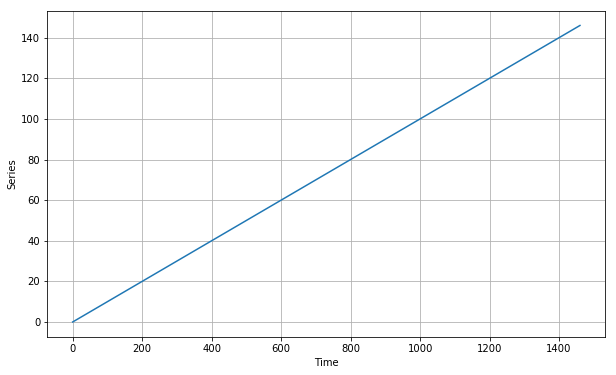

In [8]:
time = np.arange(4 * 365 + 1)
series = trend(time,slope=0.1)
plotseries(time,series)

In [36]:
def seasonal_pattern1(season_time):
    return np.where(season_time < 0.4,
                    np.tan(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality1(time,period,phase=0,amplitude=1):
    t = ((time + phase) % period) / period
    return amplitude * seasonal_pattern1(t)

In [37]:
def seasonal_pattern2(season_time):
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality2(time,period,phase=0,amplitude=1):
    t = ((time + phase) % period) / period
    return amplitude * seasonal_pattern2(t)

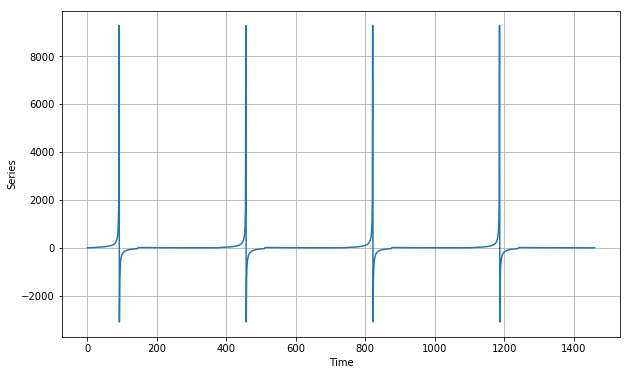

In [38]:
baseline   = 10
amplitude  = 40
series     =seasonality1(time, period=365, amplitude=amplitude)

plotseries(time,series)

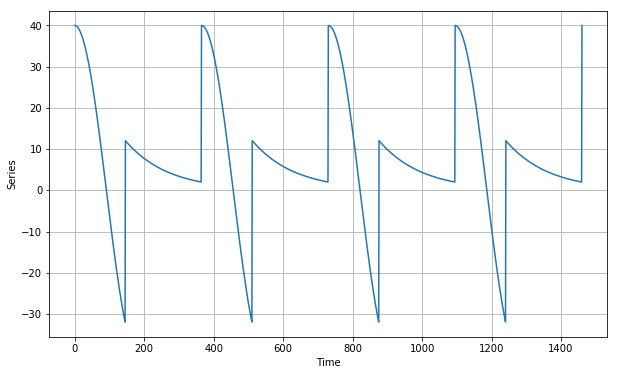

In [39]:
baseline   = 10
amplitude  = 40
series     =seasonality2(time, period=365, amplitude=amplitude)

plotseries(time,series)

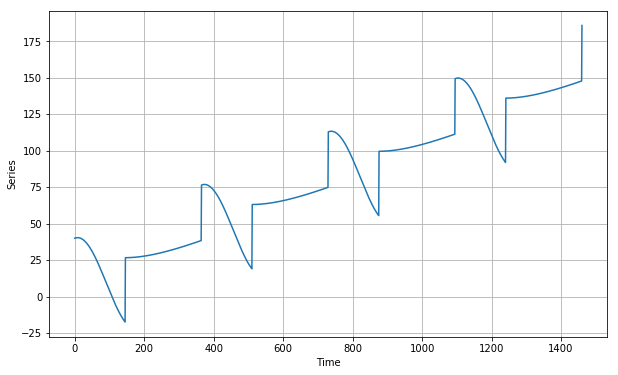

In [46]:
baseline = 0
slope = 0.1
series = baseline + trend(time,slope=slope) + seasonality2(time,365,amplitude=40)

plotseries(time,series)

In [70]:
def white_noise(time,seed=42,amplitude=1):
    np.random.seed(seed)
    return np.random.randn(len(time)) * amplitude

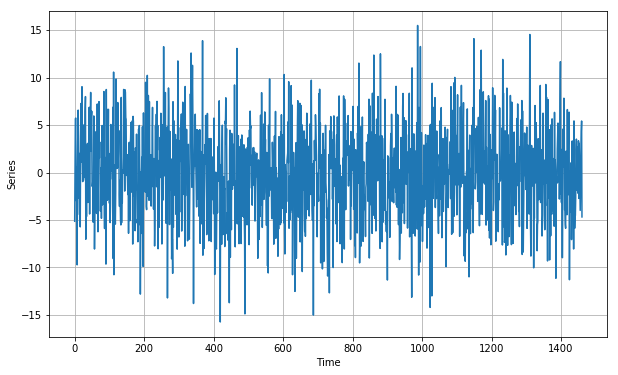

In [73]:
seed   = 108  
amplitude = 5
series = white_noise(time,seed=seed,amplitude=amplitude)

plotseries(time,series)

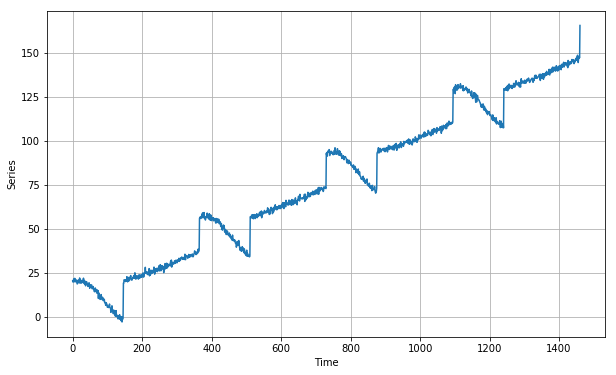

In [82]:
series = baseline + trend(time,slope=slope) +seasonality2(time,365,amplitude=20) + white_noise(time,amplitude=1)
plotseries(time,series)